# Income Prediction 
- Can we predict whether an individual earns more than $50,000 per year based on their demographic and employment-related features?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


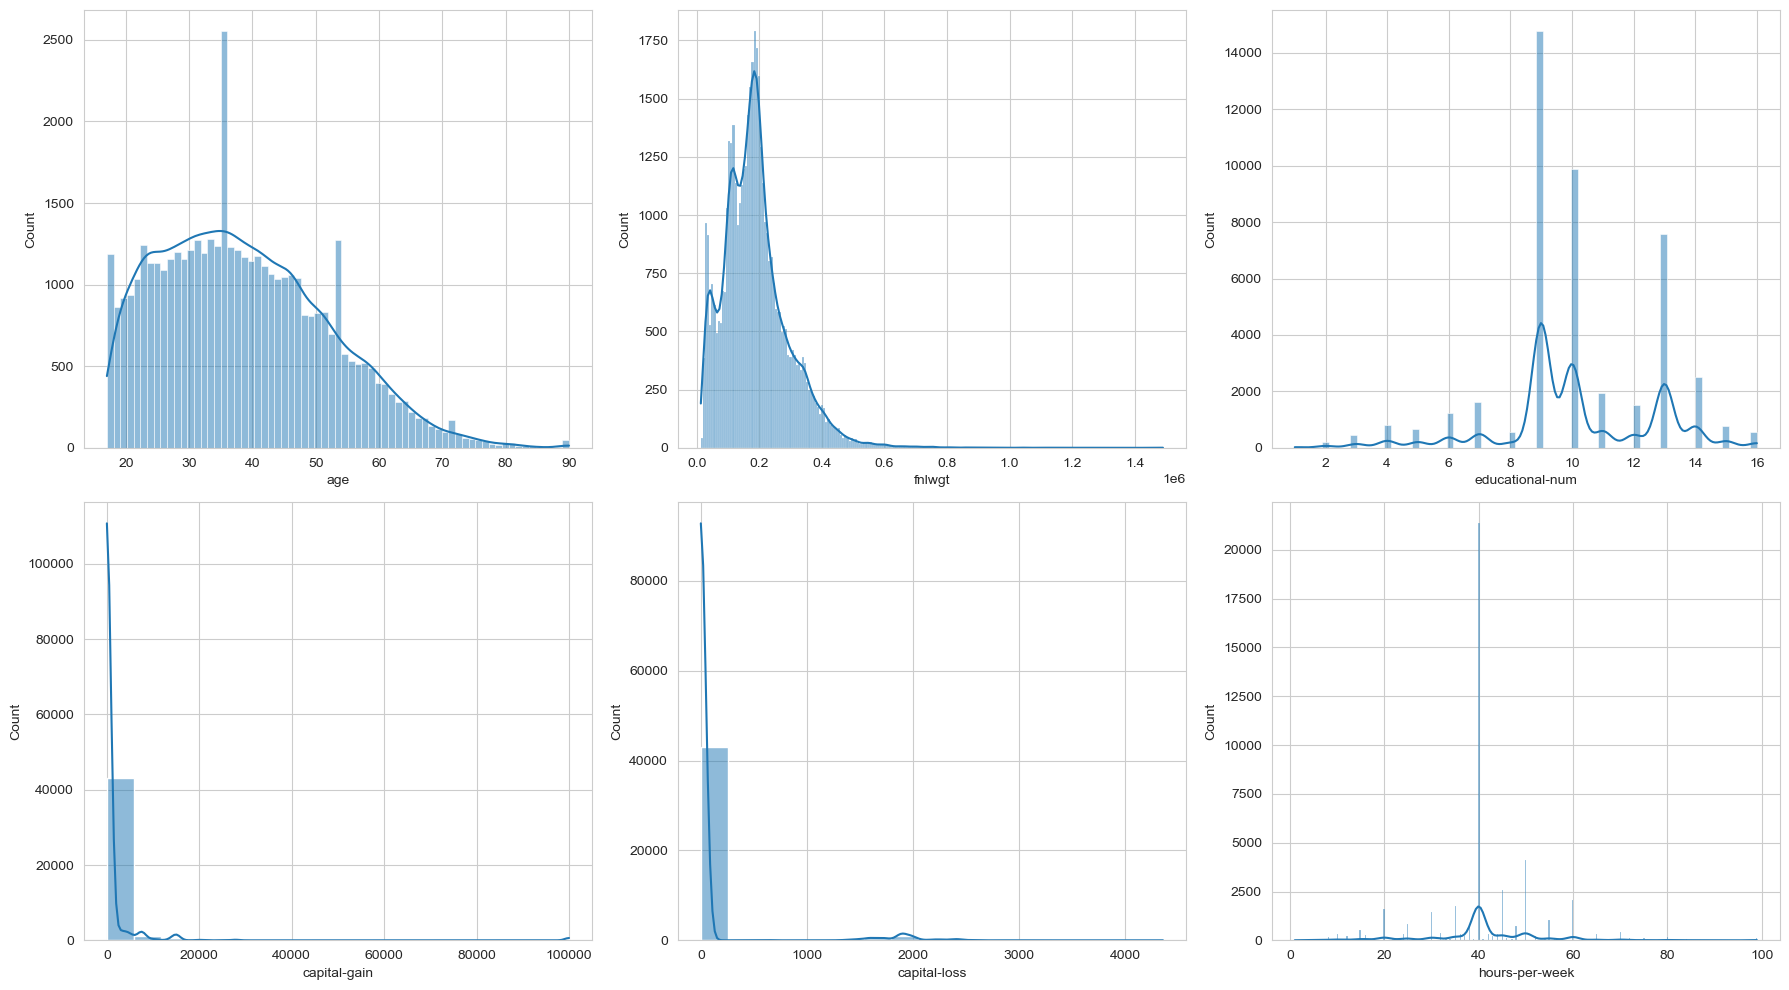

In [2]:
#To remove rows with '?' in 'occupation', 'workclass', or 'native-country'
cleaned_df = df[(df['occupation'] != '?') & (df['workclass'] != '?') & (df['native-country'] != '?')]

sns.set_style("whitegrid")

#Create histograms for key numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
num_vars = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for i, var in enumerate(num_vars):
    sns.histplot(data=cleaned_df, x=var, kde=True, ax=axes[i//3, i%3])

plt.tight_layout()
plt.show()

## Histrogram for numerical variables
- `Age:` The distribution is right-skewed
- `Fnlwgt (Final Weight):` This variable also shows a right-skewed distribution.
- `Educational-Num:` This shows a multi-modal distribution, with peaks corresponding to key educational milestones.
- `Capital Gain and Capital Loss:` Both are highly skewed, with a majority of values at 0, showing that most individuals do not have significant investment income or losses.
- `Hours per Week:` Shows a peak around the standard 40-hour work week.

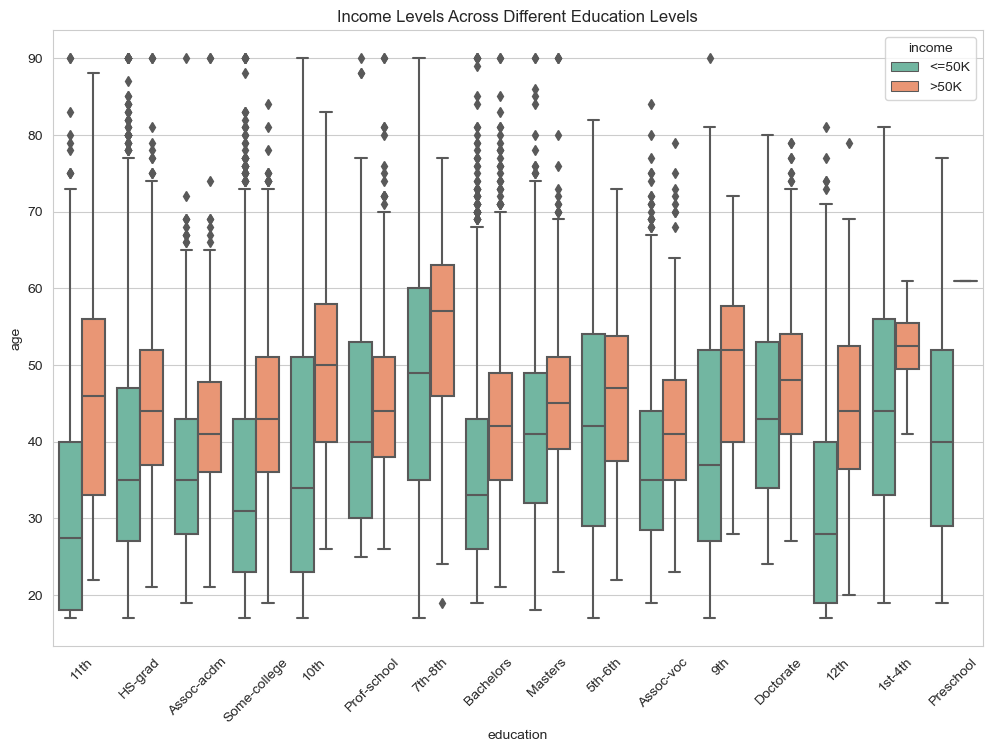

In [3]:
#Box plot for income levels across different education levels
plt.figure(figsize=(12, 8))
sns.boxplot(data=cleaned_df, x='education', y='age', hue='income', palette='Set2')
plt.xticks(rotation=45)
plt.title('Income Levels Across Different Education Levels')
plt.show()

## The box plot illustrates the relationship between education levels, age, and income:

- Individuals with higher education levels tend to have a higher proportion of incomes above 50,000 dollars.
- Individuals who have income above 50,000 dollars are generally older.

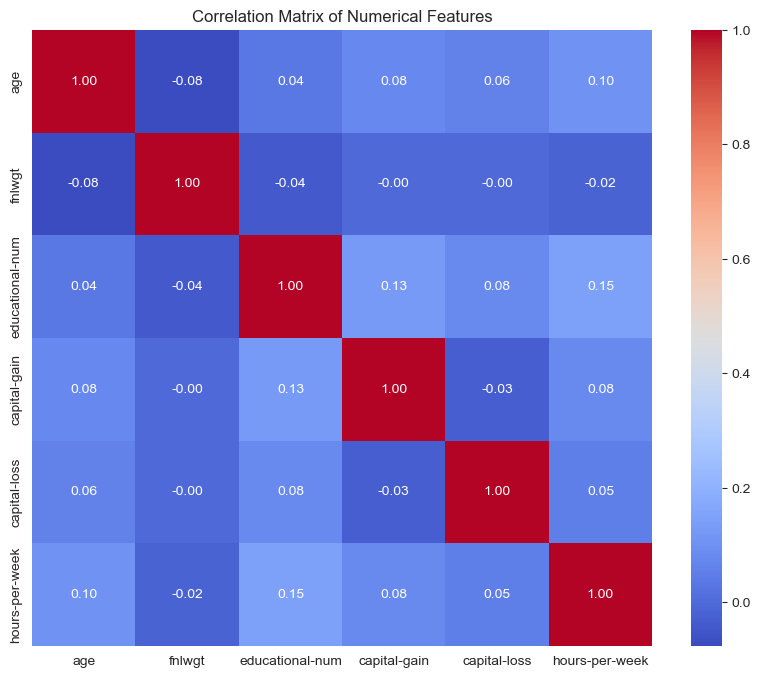

In [4]:
#Correlation matrix of numerical features
corr = cleaned_df[['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## The correlation matrix

- Most variables show low correlation with each other, showing that our features are relatively independent.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#Separate features and target variable
X = cleaned_df.drop('income', axis=1)
y = cleaned_df['income']

#One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object']))

#To Create a DataFrame with the encoded variables
encoded_columns = encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_columns, index=X.index)

#Merge encoded columns back with numerical data
X_final = pd.concat([X.select_dtypes(exclude=['object']), X_encoded_df], axis=1)

#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

/Users/teeteam/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((36177, 104), (9045, 104))

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

#Predictions on training and testing sets
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

#Evaluate the model
train_accuracy_log = accuracy_score(y_train, y_train_pred)
test_accuracy_log = accuracy_score(y_test, y_test_pred)
classification_rep_log = classification_report(y_test, y_test_pred)

#Formatting the results in a more structured way using print statements for clarity
print(f"Logistic regression Model Results:\n")
print(f"Training Accuracy: {train_accuracy_log:.2%}")
print(f"Testing Accuracy: {test_accuracy_log:.2%}\n")
print("Classification Report (Test Set):\n")
print(classification_rep_log)

Logistic regression Model Results:

Training Accuracy: 79.04%
Testing Accuracy: 79.55%

Classification Report (Test Set):

              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      6842
        >50K       0.72      0.27      0.39      2203

    accuracy                           0.80      9045
   macro avg       0.76      0.62      0.63      9045
weighted avg       0.78      0.80      0.76      9045



## Logistic regression (baseline model)
- The training and testing accuracy are closely aligned, indicating no significant overfitting in the model.

- Classification Report: 
- `Precision:` For the <=50K class, precision is 0.80, meaning that when the model predicts an income of <=50K, it is correct 80% of the time. For the >50K class, the precision is 0.72.
- `Recall:` For the <=50K class, recall is 0.97, indicating that the model identifies 97% of all actual <=50K instances. However, the recall for the >50K class is 0.27, meaning the model only identifies 27% of all actual >50K instances.
- `F1-Score:` The F1-score combines precision and recall into a single metric. For the <=50K class, it is 0.88, which is quite high. For the >50K class, it's 0.39, which is quite low and indicates that the model doesn't perform well on the higher-income bracket.


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model
rf_model.fit(X_train, y_train)

# Predicting on the training set and the test set
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluating the Random Forest model
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
classification_report_test_rf = classification_report(y_test, y_test_pred_rf)

# Formatting the results in a more structured way using print statements for clarity
print(f"Random Forest Model Results:\n")
print(f"Training Accuracy: {train_accuracy_rf:.2%}")
print(f"Testing Accuracy: {test_accuracy_rf:.2%}\n")
print("Classification Report (Test Set):\n")
print(classification_report_test_rf)

Random Forest Model Results:

Training Accuracy: 99.99%
Testing Accuracy: 85.23%

Classification Report (Test Set):

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6842
        >50K       0.73      0.63      0.67      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.85      0.85      9045



## Random forest (baseline model)
- The training accuracy is significantly higher than the testing accuracy, suggesting that the model may be overfitting to the training data.

- Classification Report
- `Precision`: for <=50K is 0.88 and for >50K is 0.73. This means that the model's predictions are reliable.
- `Recall` is 0.93 for <=50K, which is good, but for >50K, it is relatively low at 0.63, indicating that the model is missing around 37% of the >50K instances.
- `The F1-Score`, which balances precision and recall, is 0.90 for <=50K and 0.67 for >50K. The higher F1-score for <=50K reflects better overall performance for this class.


In [8]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

#Defining the hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#To create the Random Forest model
rf = RandomForestClassifier(random_state=42)

#To define the scorer
scorer = make_scorer(accuracy_score)

#Setting up RandomizedSearchCV
rs = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, scoring=scorer, random_state=42, n_jobs=-1)

#Running the random search to find the best hyperparameters
rs.fit(X_train, y_train)

#Find best parameters and best score
best_params = rs.best_params_
best_score = rs.best_score_

#Evaluate the best model with cross-validation on the training set
best_model = rs.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring=scorer)

best_params, best_score, cv_scores.mean()


({'n_estimators': 200,
  'min_samples_split': 10,
  'min_samples_leaf': 2,
  'max_depth': None},
 0.8586671089366172,
 0.8608783885227169)

In [9]:
# Since we already have the best model from the RandomizedSearchCV, we will perform cross-validation on it.

# Perform 5-fold cross-validation on the best estimator found by RandomizedSearchCV
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring=scorer)

# Output the results
cv_scores_mean = cv_scores.mean()
cv_scores_std = cv_scores.std()

cv_scores_mean, cv_scores_std, cv_scores


(0.8608783885227169,
 0.001679455748004001,
 array([0.86124931, 0.86304588, 0.86219765, 0.85915688, 0.85874223]))

- Cross-Validation Mean Score: 86.09%
- Standard Deviation of CV Scores: 0.17%
- The mean cross-validation score is the average accuracy of your model across the 5 different folds of cross-validation. It's very close to the best score you got from hyperparameter tuning.

In [10]:
# Making predictions on the test set
y_test_pred_best_rf = best_model.predict(X_test)

#Calculating the accuracy for the test set
test_accuracy_best_rf = accuracy_score(y_test, y_test_pred_best_rf)

#Generating the classification report for the test set
classification_report_test_best_rf = classification_report(y_test, y_test_pred_best_rf)

print(f"Test Accuracy: {test_accuracy_best_rf:.2%}")
print("\nClassification Report for Test Set:\n")
print(classification_report_test_best_rf)


Test Accuracy: 86.70%

Classification Report for Test Set:

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      6842
        >50K       0.78      0.63      0.70      2203

    accuracy                           0.87      9045
   macro avg       0.84      0.79      0.81      9045
weighted avg       0.86      0.87      0.86      9045



##  Random Forest model with tuning hyperparameters and evaluating it with cross-validation
- The model's test accuracy of 86.70% is closely aligned with the cross-validation mean score of 86.09%, suggesting that the model generalizes well and is not overfitting to the training data.

- `Precision:` The precision for the <=50K income class is 0.89, meaning that when the model predicts someone is in the <=50K class, it is correct 89% of the time. For the >50K class, the precision is 0.78.

- `Recall:` The recall for the <=50K class is 0.94, indicating that the model identifies 94% of the actual <=50K instances correctly. For the >50K class, the recall is 0.63, meaning the model identifies 63% of the actual >50K instances.

- `F1-Score:` The F1-score is the harmonic mean of precision and recall. For the <=50K class, it's 0.91, and for the >50K class, it's 0.70. These scores suggest that the model is quite good at identifying the <=50K class but less so for the >50K class.

To answer question 
1. Whether we can predict whether an individual earns more than $50,000 per year based on their demographic and employment-related features

- **The tuned Random Forest model with hyperparameter tuning and cross-validation** is the best at addressing the question of predicting individual income levels. It not only achieved the highest test accuracy but also demonstrated a high F1-score for the >50K income class, which indicates a strong ability to identify individuals who earn more than $50,000 accurately. The close alignment between the testing accuracy and the cross-validation mean score suggests that this model is likely to maintain its performance on new, unseen data, which is essential for making reliable predictions in a real-world setting.
